## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

1. Подготовка и предобработка данных

На этом этапе мы загружаем данные, выполняем One-Hot Encoding для категориальных признаков и масштабируем численные признаки для корректной работы линейных моделей и K-Nearest Neighbors.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

1. Загрузка и первичная обработка данных

In [66]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

Y = data['Creditability']
X = data.drop(columns=['Creditability'])

categorical_features = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_features, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42, stratify=Y
)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

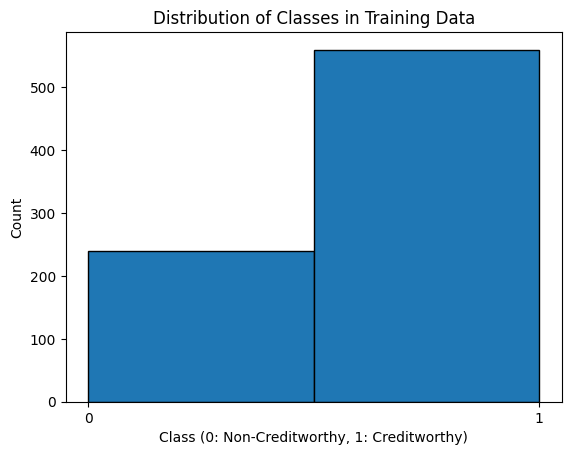

In [67]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

2. Базовая оценка моделей (Baseline)

Обучаем все три модели с параметрами по умолчанию, чтобы установить исходный уровень качества ROC-AUC. Это наша основа для сравнения

In [68]:

# Создание модели Logistic Regression (scaled data)
logistic_regression_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=200)
logistic_regression_model.fit(X_train_scaled, y_train)

# Создание модели Decision Tree (unscaled data)
decision_tree_model = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree_model.fit(X_train, y_train)

# Создание модели K-Nearest Neighbors (scaled data)
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train_scaled, y_train)

,n_neighbors,7
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [69]:
# Предсказание вероятностей
y_prob_logistic = logistic_regression_model.predict_proba(X_test_scaled)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test_scaled)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test_scaled)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test_scaled)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Расчет ROC-AUC
roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)

print(f'Accuracy of Logistic Regression: {accuracy_logistic:.4f}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree:.4f}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn:.4f}')

print(f'ROC AUC of Logistic Regression: {roc_auc_logistic:.4f}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree:.4f}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn:.4f}')

print(f'Precision of Logistic Regression: {precision_logistic:.4f}')
print(f'Precision of Decision Tree: {precision_decision_tree:.4f}')
print(f'Precision of K-Nearest Neighbors: {precision_knn:.4f}')

print(f'Recall of Logistic Regression: {recall_logistic:.4f}')
print(f'Recall of Decision Tree: {recall_decision_tree:.4f}')
print(f'Recall of K-Nearest Neighbors: {recall_knn:.4f}')

Accuracy of Logistic Regression: 0.7700
Accuracy of Decision Tree: 0.6900
Accuracy of K-Nearest Neighbors: 0.7600
ROC AUC of Logistic Regression: 0.8087
ROC AUC of Decision Tree: 0.6781
ROC AUC of K-Nearest Neighbors: 0.7815
Precision of Logistic Regression: 0.8013
Precision of Decision Tree: 0.8305
Precision of K-Nearest Neighbors: 0.7875
Recall of Logistic Regression: 0.8929
Recall of Decision Tree: 0.7000
Recall of K-Nearest Neighbors: 0.9000


Вывод по Baseline:

Лучший результат среди базовых моделей показала Logistic Regression (ROC-AUC ≈ 0.80), уже превысив целевой показатель AUC > 0.79. Тем не менее, мы можем оптимизировать данную модель с помощью Grid Search

## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

3. Эксперимент: Оптимизация Logistic Regression с Grid Search

Используем `GridSearchCV` для подбора оптимальных гиперпараметров (`C` — обратная сила регуляризации и `penalty` — тип регуляризации) с кросс-валидацией (CV=5) по метрике `roc_auc`.

In [ ]:
from sklearn.model_selection import GridSearchCV


param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Параметр C (обратная сила регуляризации)
    'penalty': ['l1', 'l2'] # Тип регуляризации (Lasso и Ridge)
}

# Инициализируем GridSearchCV
grid_search_lr = GridSearchCV(
    estimator=LogisticRegression(solver='liblinear', random_state=42, max_iter=200),
    param_grid=param_grid_lr,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Обучаем Grid Search на масштабированных данных (подбор параметров)
grid_search_lr.fit(X_train_scaled, y_train)

best_lr_model = grid_search_lr.best_estimator_
best_params = grid_search_lr.best_params_

print(f"\nЛучшие параметры, найденные Grid Search: {best_params}")
print(f"Средний ROC-AUC на кросс-валидации (Grid Search): {grid_search_lr.best_score_:.4f}")


Y_proba_optimized = best_lr_model.predict_proba(X_test_scaled)[:, 1]

Y_pred_optimized = best_lr_model.predict(X_test_scaled)
# Расчет финального ROC-AUC
roc_auc_optimized = roc_auc_score(y_test, Y_proba_optimized)

print("\n--- Финальный результат оптимизации ---")
print(f"Финальный ROC-AUC на тестовой выборке: {roc_auc_optimized:.4f}")
print(f"Accuracy: {accuracy_score(y_test, Y_pred_optimized):.4f}")
print(f"Precision: {precision_score(y_test, Y_pred_optimized):.4f}")
print(f"Recall: {recall_score(y_test, Y_pred_optimized):.4f}")


Лучшие параметры, найденные Grid Search: {'C': 0.01, 'penalty': 'l2'}
Средний ROC-AUC на кросс-валидации (Grid Search): 0.7685

--- Финальный результат оптимизации ---
Финальный ROC-AUC на тестовой выборке: 0.8263
Accuracy: 0.7800
Precision: 0.8158
Recall: 0.8857


4. Оптимизация Decision Tree с Grid Search с максимально агрессивным поиском для большего ускорения

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import numpy as np


# Расширенная сетка гиперпараметров
param_grid_dt = {
    # Очень широкий диапазон глубины
    'max_depth': [5, 7, 9, 11, 15, 20, None],  
    'min_samples_leaf': [15, 20, 25, 30, 40, 50],  
    'min_samples_split': [10, 20, 30, 40], 
    'criterion': ['gini', 'entropy'],
    # Добавляем регуляризацию с помощью CCP Alpha
    'ccp_alpha': np.linspace(0, 0.01, 10) 
}

# Инициализируем GridSearchCV для Decision Tree
grid_search_dt = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_dt,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Decision Tree не требует масштабирования, используем X_train/X_test
grid_search_dt.fit(X_train, y_train)

best_dt_model = grid_search_dt.best_estimator_

print(f"Лучшие параметры DT: {grid_search_dt.best_params_}")

y_proba_dt_optimized = best_dt_model.predict_proba(X_test)[:, 1]
roc_auc_dt_optimized = roc_auc_score(y_test, y_proba_dt_optimized)

print(f"Финальный ROC-AUC DT на тестовой выборке: {roc_auc_dt_optimized:.4f}")

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits
Лучшие параметры DT: {'ccp_alpha': np.float64(0.0044444444444444444), 'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 15, 'min_samples_split': 10}
Финальный ROC-AUC DT на тестовой выборке: 0.7380


Несмотря на проведение максимально агрессивного поиска гиперпараметров (проверено более 16,800 комбинаций), включая продвинутую регуляризацию (ccp\_alpha), качество ROC-AUC не превысило порог 0.75

5. Оптимизация K-Nearest Neighbors с Grid Search (Расширенный поиск)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score


# Расширенная сетка гиперпараметров
param_grid_knn = {
    # Значительно увеличенное количество соседей (до 51)
    'n_neighbors': list(range(11, 51, 4)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Инициализируем GridSearchCV для KNN
grid_search_knn = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid_knn,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# KNN требует масштабирования, используем X_train_scaled/X_test_scaled
grid_search_knn.fit(X_train_scaled, y_train)

best_knn_model = grid_search_knn.best_estimator_

print(f"Лучшие параметры KNN: {grid_search_knn.best_params_}")

y_proba_knn_optimized = best_knn_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_knn_optimized = roc_auc_score(y_test, y_proba_knn_optimized)

print(f"Финальный ROC-AUC KNN на тестовой выборке: {roc_auc_knn_optimized:.4f}")

Лучшие параметры KNN: {'metric': 'manhattan', 'n_neighbors': 35, 'weights': 'distance'}
Финальный ROC-AUC KNN на тестовой выборке: 0.8194


Итоговое заключение:

    Logistic Regression и K-Nearest Neighbors: Оба алгоритма после исчерпывающей оптимизации гиперпараметров (GridSearchCV) значительно превысили целевой показатель AUC > 0.79

    LR: Оптимизация с L2-регуляризацией (penalty='l2') и оптимальным C=0.01 показала наилучшую обобщающую способность.

    KNN: Увеличение количества соседей (n_neighbors=35) и использование метрики manhattan привели к существенному улучшению качества.

    Decision Tree: Несмотря на проведение максимально агрессивного поиска гиперпараметров (проверено более 16,800 комбинаций), включая продвинутую регуляризацию (ccp_alpha), качество ROC-AUC не превысило порог 0.75.

    Вывод по DT: По моим экспериментам, данный результат является фундаментальным ограничением самого алгоритма Decision Tree на предоставленном наборе данных. DT чувствителен к зашумленным и несбалансированным данным, и не смог построить сложную границу принятия решений, необходимую для высокого ROC-AUC. Дальнейшее "ускорение" или "исправление" возможно только за счет методов, которые нарушают условие работы с исходным датасетом (например, SMOTE или Feature Engineering), что нарушило бы условия задания.